# Linear Model in action


Here we will see linear models in action and meet our first Villain in predictive modelling: overfitting.

Let's begin with quickly importing the packages we will need here.

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

Next, we continue with our example dataset, but let's only fetch 70 subjects this time, for simplicity.

In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/pni-lab/predmod_lecture/master/ex_data/IXI/ixi.csv").iloc[:70, :]

We will consider Age as prediction target, i.e. aim to build a predictive model which predicts age based on brain morphology.
Let's see the age distribution in the dataset by plotting a histogram.

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

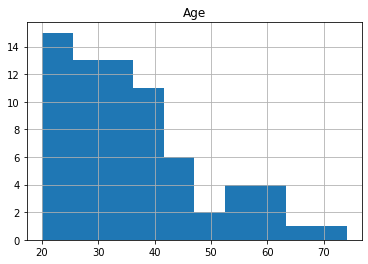

In [15]:
df.hist('Age')


Possibly the simplest possible prediction for age could be a constant number, e.g. the mean age of the study population (36.3 years).
Such trivial predictions often serve as a baseline to which "real" predictive models are compared to.

```{note}
Weather forecast example: saying that tomorrow the weather will be tha same as it was today is a basline guess that was actually challenging to surpass by early wether forecast models.
```

```{admonition} Excercise 2.1
Try running this notebook interactively and print out the mean value for age and other variables.
Try these options: `df['Age'].mean()`, `df.mean()` and `df.describe()`.
```

```{admonition} Excercise 2.2
Think about a straighforward way of estimating how much we are wrong on average when using mean age as our prediction?
```

Obviously, we can hope to improve upon such trivial predictions by using additional variables that are associated to the target variable.

Do we have such variables in this dataset? Of course!

Let's recreate the plot of the association between age and the volume of the right superior frontal cortex, as we saw it in the previous section.

<AxesSubplot:xlabel='rh_superiorfrontal_volume', ylabel='Age'>

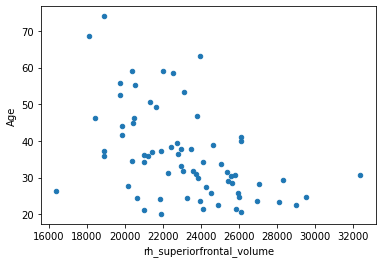

In [16]:
df.plot.scatter(x='rh_superiorfrontal_volume', y='Age')

As discussed in the previous page, linear models provide means to objectively characterize such an association.
Let's fit a linear model with the ols (ordinary least squares) function from the python package '[statsmodels](https://scipy.org/)' to assess the strength of the correlation.
The syntax is similar to R's linear models, we provide the formula, the data frame and fit the model.

# Fitting a simple linear model

In [17]:
fitted_model = smf.ols('Age ~ rh_superiorfrontal_volume', df).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     20.33
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           2.64e-05
Time:                        11:04:22   Log-Likelihood:                -266.04
No. Observations:                  70   AIC:                             536.1
Df Residuals:                      68   BIC:                             540.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    82.4338     10.323      7.985      0.000      61.834     103.034
rh_superiorfrontal_volume    -0.0020      0.000     -4.509      0.000      -0.003      -0.001
==============================================================================
Omnibus:                        5.368   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                4.600
Skew:                           0.602   Prob(JB):                        0.100
Kurtosis:                       3.354   Cond. No.                     1.84e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can also obtain the beta coefficients from the equation:

$$
y_{i}=\beta _{0}+\beta _{1}x_{{i}}+\varepsilon _{i}
$$

In [18]:
beta=fitted_model.params
beta

Intercept                    82.433762
rh_superiorfrontal_volume    -0.001994
dtype: float64

And use them to calculate predictions with based on the equation.
Let's predict the age of a hypotetical new participant who's right superior frontal cortex has a volume of $25000 mm^3$.

In [19]:
x_new = 25000
yhat = beta[0] + beta[1]*x_new
print('Predicted age:', yhat, 'years')

Predicted age: 32.57850401691034 years


<AxesSubplot:xlabel='rh_superiorfrontal_volume', ylabel='Age'>

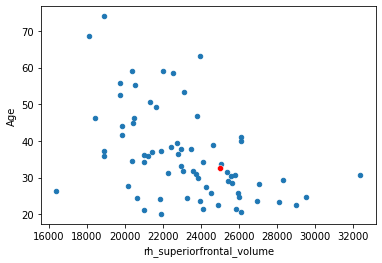

In [20]:
df.plot.scatter(x='rh_superiorfrontal_volume', y='Age',)
sns.scatterplot(x=[x_new], y=[yhat], color='red')

Another one.

<AxesSubplot:xlabel='rh_superiorfrontal_volume', ylabel='Age'>

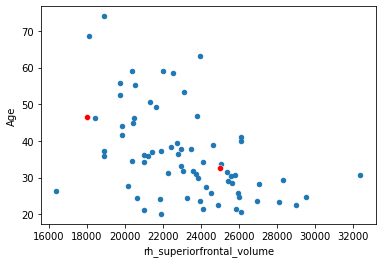

In [21]:
x_new = np.array([25000, 18000])
yhat = beta[0] + beta[1]*x_new
df.plot.scatter(x='rh_superiorfrontal_volume', y='Age',)
sns.scatterplot(x=x_new, y=yhat, color='red')

Now let's plot many different values.

<AxesSubplot:xlabel='rh_superiorfrontal_volume', ylabel='Age'>

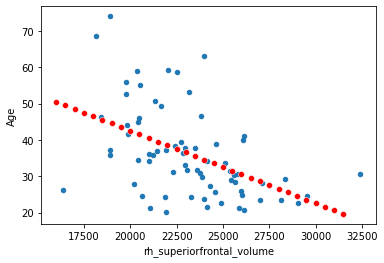

In [22]:
x_new = np.arange(start=16000, stop=32000, step=500)
yhat = beta[0] + beta[1]*x_new
df.plot.scatter(x='rh_superiorfrontal_volume', y='Age')
sns.scatterplot(x=x_new, y=yhat, color='red')

Yes, this is what we call the regression line.
The seaborn package from pythin has some more handy ways of plotting it (with 95% confidence intervals):

<AxesSubplot:xlabel='rh_superiorfrontal_volume', ylabel='Age'>

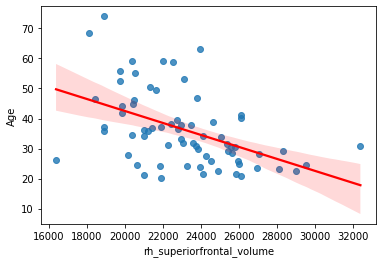

In [23]:
sns.regplot(x='rh_superiorfrontal_volume', y='Age', data=df, line_kws={"color": "red"})

:::{note}
You might have noticed that the distribution of the plotted variables is not Normal.
Normality assumption and other requirements are of course extremely important for "traditional" statistical inference, i.e. if you want to obtain p-values.
In this book we will see how the predictive modelling frees up itself from these assumptions.
Normality and other assumptions never harm, but they are not required anymore in case of a properly validated predictive model.
:::

Now, let's calculate how much the prediction is off on average, by doing a prediction for all original predictor values:

In [24]:
x_new = df['rh_superiorfrontal_volume']
yhat = fitted_model.predict(x_new)
# Now we have computed the predictions with the dedicated function from the `statsmodel` package, but it is equivalent with this:
# yhat = beta[0] + beta[1]*x_new
print('root mean squared error (MSE):  ', np.sqrt(np.mean(np.square(df['Age'] - yhat))), 'years')
print('    mean absolute error (MAE):  ', np.mean(np.abs(df['Age'] - yhat)), 'years')

root mean squared error (MSE):   10.823141363809432 years
    mean absolute error (MAE):   8.159445133839563 years


# Adding more predictors

So far so good.
However, at this point it becomes straightforward to ask: can we improve on this prediction by adding more predictors?

In [25]:
fitted_model = smf.ols('Age ~ rh_superiorfrontal_volume + lh_bankssts_volume + lh_caudalanteriorcingulate_volume + lh_caudalmiddlefrontal_volume + lh_cuneus_volume', df).fit()
yhat = fitted_model.predict(df[['rh_superiorfrontal_volume', 'lh_bankssts_volume', 'lh_caudalanteriorcingulate_volume', 'lh_caudalmiddlefrontal_volume', 'lh_cuneus_volume']])
print('root mean squared error (MSE):  ', np.sqrt(np.mean(np.square(df['Age'] - yhat))), 'years')
print('    mean absolute error (MAE):  ', np.mean(np.abs(df['Age'] - yhat)), 'years')

root mean squared error (MSE):   10.487993856395724 years
    mean absolute error (MAE):   7.96744497323358 years


Error decreased... So let's see what happens when we add more and more regions!

<AxesSubplot:>

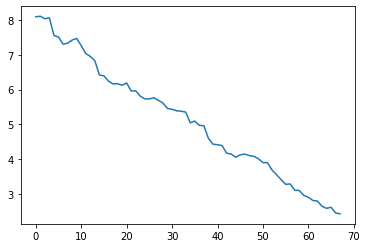

In [26]:
mae = []

reg_numbers = range(68)

for num_reg in reg_numbers:
    df_sub = df.drop('Age', axis=1).sample(axis='columns', n=num_reg+1, random_state=42)
    df_sub['rh_superiorfrontal_volume'] = df['rh_superiorfrontal_volume']
    all_predictors = df_sub.columns
    df_sub['Age'] = df['Age']
    fitted_model = smf.ols('Age ~ df_sub[all_predictors]', df_sub).fit()
    yhat = fitted_model.predict(df_sub)
    mae.append(np.mean(np.abs(df['Age'] - yhat)))
sns.lineplot(x=reg_numbers, y=mae)

When adding all regions, the mean absolute error decreases to:

In [27]:
min(mae)

2.4261128153319675

Too good to be true! Latest predictive models in the literature usually report a mean absolute error around 3-5 years, with MAE=2.71 ± 2.10 being one of the top-performnig examples, achieved by a deep learning model trained on many thousands of subjects {cite:p}`dinsdale2021learning`.

To illustrate what's wrong, let's add randomly generated predictors, that can be garanteed to be independent of the target variable (age).

Min MAE: 1.3992282965463547


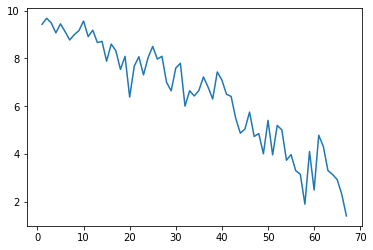

In [28]:
mae = []

reg_numbers = range(1,68)
rng = np.random.default_rng(seed = 42)

for num_reg in reg_numbers:
    df_random = pd.DataFrame(rng.normal(loc=0, scale=1, size=(len(df), num_reg+1)))
    all_predictors = df_random.columns
    fitted_model = smf.ols('df.Age ~ df_random', df_random).fit()
    yhat = fitted_model.predict(df_random)
    mae.append(np.mean(np.abs(df['Age'] - yhat)))

sns.lineplot(x=reg_numbers, y=mae)
print('Min MAE:', min(mae))

What the heck? Mean absolute error is even lower, even though the model is based on totally random predictors?
What we see here is called:

## Overfitting

Overfitting happens when the model utilizes random variance in the predictors to fit specific characteristics of dataset at hand.
The more predictors you have - i.e. the more complex your model is - the more prone it gets to overfit that data it is trained on.

```{note}
A helpful (but somewhat limiting) methaphore for overfitting is to think about it as the model learning the data at hand, instead of the underlying relationships.
```

In the next page we will see some real world examples of overfitting.

In the next section ([section 3](../3_cross_validation/index.md)) we will see how we can evaluate predictive performance in an unbiased way, i.e. by ruling out overfitting.
In [section 4](../4_reducing_complexity/index.md) and [5](../5_hyperparameter_optimization/index.md) we will see how we can fine tune model complexity to find the sweet spot between oversimplification and overfitting, which is the bread and butter of predictive modelling and machine learning.

```{note}
A possible solution to handle many predictors is to fit a separate model for each predictor, so that the target and the predictor variable are swapped.
This approach is referred to as mass univariate analysis and is very widespread e.g. in analysis of task-based functional MRI analysis.
A drawback of this approach is that the researcher has to correct for the [multiple comparisons](https://en.wikipedia.org/wiki/Multiple_comparisons_problem), often making the analysis overly conservative.

Consider looking up '[Andy's Brain Book](https://andysbrainbook.readthedocs.io/en/latest/fMRI_Short_Course/fMRI_05_1stLevelAnalysis.html)' for more details.
```

:::{admonition} Excercise 2.3
:class: tip, dropdown
What could be the reason of higher overfitting with random noise than with the true cortical volume data?

:::{admonition} Help
:class: tip, dropdown
Plot out the correlation structure of the real and the randomly simulated data with this commands:
```
sns.heatmap(np.corrcoef(df_random.values))
sns.heatmap(np.corrcoef(df_sub.values))
```
:::

:::{admonition} Excercise 2.4
:class: tip, dropdown
Launch this notebook interactively in Google Colab, upload and open your own dataset and fit some interesting models of your own choice.
Try adding many predictors. Is your model suspicious of overfitting?
:::